# AdaBoost from scratch

In [ ]:
import numpy as np

# Helper function to calculate the sign of the sum
def sign(x):
    return np.where(x >= 0, 1, -1)

# Decision stump as a weak classifier
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_index]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
        return predictions

    def fit(self, X, y, weights):
        n_samples, n_features = X.shape
        min_error = float('inf')

        for feature_i in range(n_features):
            X_column = X[:, feature_i]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                for polarity in [1, -1]:
                    predictions = np.ones(n_samples)
                    if polarity == 1:
                        predictions[X_column < threshold] = -1
                    else:
                        predictions[X_column > threshold] = -1

                    error = sum(weights[y != predictions])

                    if error < min_error:
                        self.polarity = polarity
                        self.threshold = threshold
                        self.feature_index = feature_i
                        min_error = error

        self.alpha = 0.5 * np.log((1 - min_error) / (min_error + 1e-10))



In [ ]:
class AdaBoost:
    def __init__(self, n_classifiers=5):
        self.n_classifiers = n_classifiers
        self.classifiers = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights
        weights = np.full(n_samples, (1 / n_samples))

        # Convert labels to {-1, 1}
        y = np.where(y == 0, -1, 1)

        for _ in range(self.n_classifiers):
            classifier = DecisionStump()
            classifier.fit(X, y, weights)

            predictions = classifier.predict(X)
            incorrect = (predictions != y)

            weights *= np.exp(classifier.alpha * incorrect * 2)
            weights /= np.sum(weights)

            self.classifiers.append(classifier)

    def predict(self, X):
        classifier_preds = [classifier.alpha * classifier.predict(X) for classifier in self.classifiers]
        y_pred = np.sum(classifier_preds, axis=0)
        return sign(y_pred)


In [ ]:
# Toy dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# Instantiate and fit AdaBoost model
ada = AdaBoost(n_classifiers=5)
ada.fit(X, y)

# Predicting
y_pred = ada.predict(X)

print("Predictions:", y_pred)


Predictions: [-1 -1  1  1  1]


# Adaboost from sklearn

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoost with a decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train AdaBoost model
ada_boost.fit(X_train, y_train)

# Predict
y_pred = ada_boost.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# predict
y_pred = ada_boost.predict(X_test)
print("Predictions:", y_pred)


Accuracy: 0.9666666666666667
Predictions: [1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# make an dataset about student pass or fail based on their marks

marks = np.array([[10, 20], [20, 30], [30, 40], [40, 50], [50, 60]])

y = np.array([1, 1, 0, 0, 1])

# Instantiate and fit AdaBoost model
ada = AdaBoost(n_classifiers=5)
ada.fit(marks, y)

# Predicting
y_pred = ada.predict(marks)

print("Predictions:", y_pred)

Predictions: [ 1  1 -1 -1  1]


# Adaboost Varients
  1. SAMME
  2. SAMME.R

In [ ]:
# 1. Adaboost SAMME
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator (a simple decision tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost SAMME classifier
ada_samme = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, algorithm="SAMME") # Here we use SAMME instead of SAMME

# Train the classifier
ada_samme.fit(X_train, y_train)

# Make predictions
y_pred = ada_samme.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost SAMME Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost SAMME Accuracy: 1.00


In [ ]:
# Create the AdaBoost SAMME.R classifier
ada_samme_r = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, algorithm="SAMME.R")

# Train the classifier
ada_samme_r.fit(X_train, y_train)

# Make predictions
y_pred_r = ada_samme_r.predict(X_test)

# Evaluate the accuracy
accuracy_r = accuracy_score(y_test, y_pred_r)
print(f"AdaBoost SAMME.R Accuracy: {accuracy_r:.2f}")


AdaBoost SAMME.R Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print(f"AdaBoost SAMME Accuracy: {accuracy:.2f}")
print(f"AdaBoost SAMME.R Accuracy: {accuracy_r:.2f}")


AdaBoost SAMME Accuracy: 1.00
AdaBoost SAMME.R Accuracy: 1.00


# Handeling Overfitting

In [ ]:
# 1. Regularization Techhniques

    # Base Learner pruning
    # Early stopping

# code :-

# Base Learner Pruning
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base estimator with pruning (limiting max depth and min samples split)
base_estimator = DecisionTreeClassifier(max_depth=2, min_samples_split=10)

# AdaBoost with the pruned base estimator
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=42)

# Train the model
ada.fit(X_train, y_train)

# Evaluate on the test set
test_score = ada.score(X_test, y_test)
print(f"Test Score: {test_score:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Score: 0.85


In [ ]:
# Early stopping
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost with manual early stopping
best_score = 0
early_stopping_rounds = 10
no_improvement_count = 0
n_estimators = 200
learning_rate = 1.0

for i in range(1, n_estimators + 1):
    # Initialize AdaBoost with the current number of estimators
    ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=i, learning_rate=learning_rate, random_state=42)

    # Train the model
    ada.fit(X_train, y_train)

    # Evaluate on the validation set
    val_score = accuracy_score(y_val, ada.predict(X_val))
    print(f"Round {i}, Validation Score: {val_score:.4f}")

    # Check for improvement
    if val_score > best_score:
        best_score = val_score
        no_improvement_count = 0
        best_model = ada  # Save the best model
    else:
        no_improvement_count += 1

    # Stop if no improvement for `early_stopping_rounds` rounds
    if no_improvement_count >= early_stopping_rounds:
        print(f"Early stopping after {i} rounds.")
        break

# Evaluate the best model on the test set
test_score = accuracy_score(y_test, best_model.predict(X_test))
print(f"Test Score with Early Stopping: {test_score:.4f}")


Round 1, Validation Score: 0.8350
Round 2, Validation Score: 0.8350
Round 3, Validation Score: 0.8350
Round 4, Validation Score: 0.8350


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Round 5, Validation Score: 0.8350
Round 6, Validation Score: 0.8350
Round 7, Validation Score: 0.8350
Round 8, Validation Score: 0.8450


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Round 9, Validation Score: 0.8400
Round 10, Validation Score: 0.8400


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Round 11, Validation Score: 0.8400
Round 12, Validation Score: 0.8400


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Round 13, Validation Score: 0.8350
Round 14, Validation Score: 0.8400


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Round 15, Validation Score: 0.8300


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Round 16, Validation Score: 0.8250


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Round 17, Validation Score: 0.8250
Round 18, Validation Score: 0.8250
Early stopping after 18 rounds.
Test Score with Early Stopping: 0.8850


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Scaling AdaBoost to Large Datasets
    Implementing Parallelization and Random Sampling

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Create a large synthetic dataset
X, y = make_classification(n_samples=100000, n_features=20, random_state=42)

# Downsample the dataset to speed up training (for demonstration)
X_sample, y_sample = resample(X, y, n_samples=10000, random_state=42)

# Base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost with parallelization (n_jobs=-1 uses all processors)
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
ada.fit(X_sample, y_sample)

# Evaluate on a random subset of the test set
X_test, y_test = resample(X, y, n_samples=10000, random_state=42)
test_score = ada.score(X_test, y_test)
print(f"Test Score on Scaled Dataset: {test_score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Score on Scaled Dataset: 0.8666


# Performance Evaluation
    Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold



# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10)

# Perform cross-validation
cv_scores = cross_val_score(ada, X_sample, y_sample, cv=skf, scoring='accuracy')
print(f"Cross-Validated Accuracy: {cv_scores.mean():.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Cross-Validated Accuracy: 0.8645


# Metrics for AdaBoost
    Evaluating using Accuracy, F1-Score, and ROC-AUC


Accuracy: 0.8666
F1 Score: 0.8678
ROC-AUC: 0.9455
Confusion Matrix:
[[4289  667]
 [ 667 4377]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4956
           1       0.87      0.87      0.87      5044

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



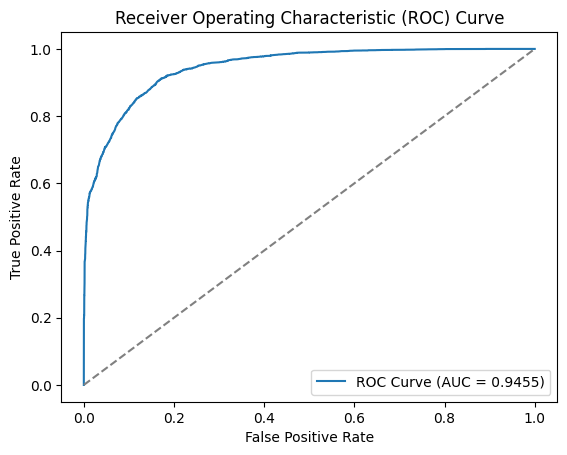

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = ada.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC
y_prob = ada.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
